In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import cv2

In [2]:
# read image in grayscale
img = cv2.imread('elephant.bmp', 0)

In [3]:
# obtain svd
U, S, V = np.linalg.svd(img)

In [4]:
# inspect shapes of the matrices

print("Dimension of U matrix : ",U.shape)
print("Dimension of S matrix : ",S.shape)
print("Dimension of V matrix : ",V.shape)

Dimension of U matrix :  (797, 797)
Dimension of S matrix :  (660,)
Dimension of V matrix :  (660, 660)


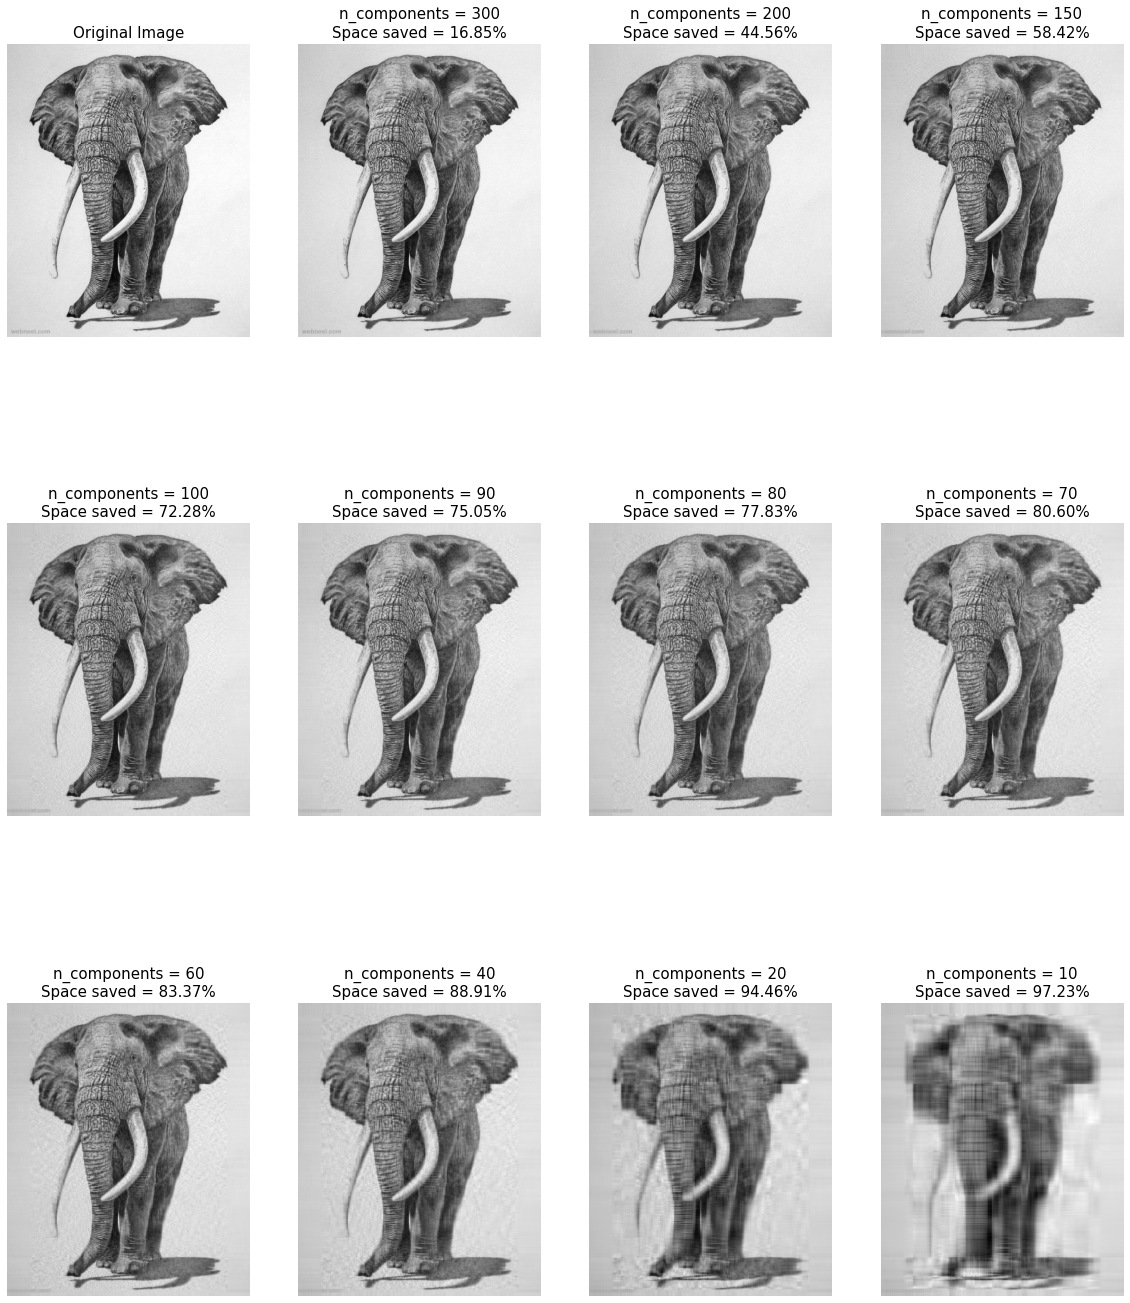

In [5]:
# plot images with different number of singular values and calculate the mean squared error

plt.figure(figsize = (20, 25))
plt.subplot(3, 4, 1)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title("Original Image", fontsize=15)

comps = [300, 200, 150, 100, 90, 80, 70, 60, 40, 20, 10]
n = []
error = []

j = 2
for i in range(660, 9, -10):
    n.append(i)
    low_rank = U[:, :i] @ np.diag(S[:i]) @ V[:i, :]
    error.append(mean_squared_error(img, low_rank))
    if i in comps:
        compression_ratio = (img.shape[0]*img.shape[1])/(i*(U.shape[0]+1+V.shape[1]))
        space_saving = (1-1/compression_ratio)*100
        plt.subplot(3, 4, j)
        plt.imshow(low_rank, cmap = 'gray')
        plt.axis('off')
        plt.title("n_components = " + str(i) + "\nSpace saved = {:.2f}%".format(space_saving), fontsize=15)
        j += 1

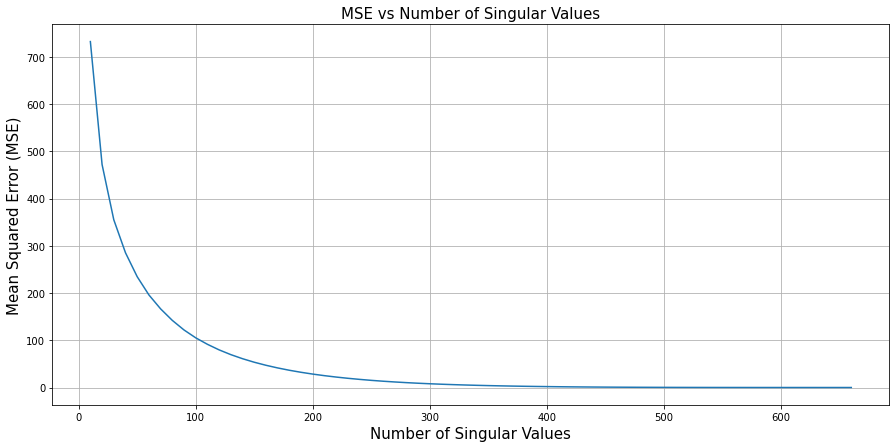

In [6]:
# MSE graph
plt.figure(figsize = (15, 7))
plt.plot(n, error)
plt.grid()
plt.xlabel('Number of Singular Values', fontsize=15)
plt.ylabel('Mean Squared Error (MSE)', fontsize=15)
plt.title('MSE vs Number of Singular Values', fontsize=15)
plt.show()

[93.001  1.651  0.903  0.693  0.523  0.37   0.271  0.228  0.192  0.132]


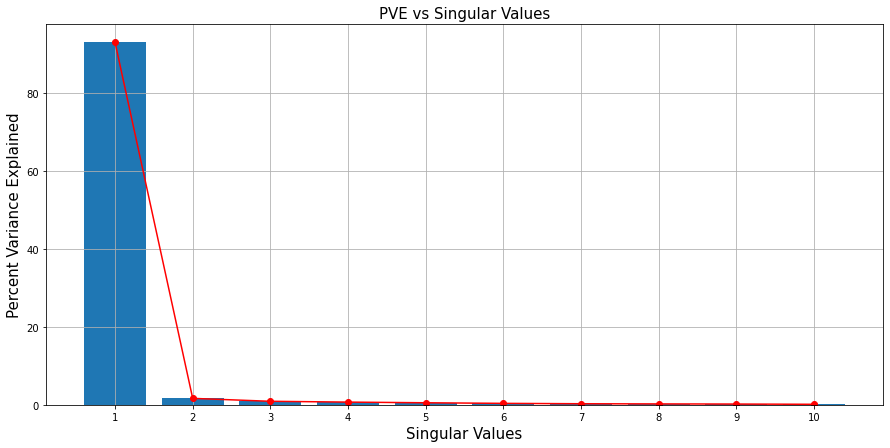

In [7]:
# Scree plot
sv = []
for i in range(1, 11):
    sv.append(str(i))
variance = np.round((np.square(S[:10])/np.sum(np.square(S)))*100, decimals = 3)
print(variance)

plt.figure(figsize = (15, 7))
plt.bar(sv, variance)
plt.plot(sv, variance, 'ro-')
plt.grid()
plt.xlabel('Singular Values', fontsize=15)
plt.ylabel('Percent Variance Explained', fontsize=15)
plt.title('PVE vs Singular Values', fontsize=15)
plt.show()

In [8]:
# read image in grayscale
img = cv2.imread("butterfly.bmp",0)

In [9]:
# calculate svd
U, S, V = np.linalg.svd(img)

# inspect shapes of the matrices
print("Dimension of U matrix : ",U.shape)
print("Dimension of S matrix : ",S.shape)
print("Dimension of V matrix : ",V.shape)

Dimension of U matrix :  (647, 647)
Dimension of S matrix :  (647,)
Dimension of V matrix :  (1024, 1024)


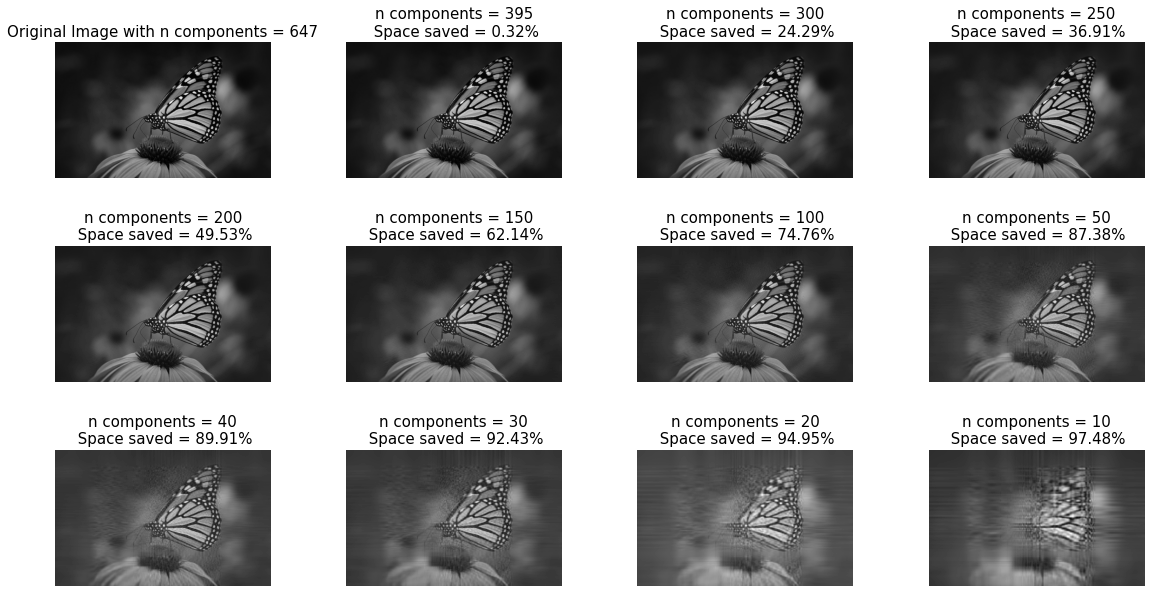

In [10]:
# plot images with different number of singular values and calculate the mean squared error

mse =[]
mn = U.shape[0] * V.shape[1]
d = U.shape[0] + V.shape[1] +1

sing_val = [647, 395, 300, 250, 200, 150, 100, 50, 40, 30, 20, 10]

plt.figure(figsize = (20, 10))

for i in range(12):
    low_rank = U[:, :sing_val[i]] @ np.diag(S[:sing_val[i]]) @ V[:sing_val[i], :]
    
    if(i  == 0):
        plt.subplot(3, 4, i+1)
        plt.imshow(low_rank, cmap = 'gray')
        plt.axis('off')
        plt.title("Original Image with n components = " + str(sing_val[i]), fontsize = 15)
        mse.append(mean_squared_error(img,low_rank))
        
    else:
        cr = mn/(sing_val[i] * d)
        ss = (1-(1/cr))*100
        plt.subplot(3, 4, i+1)
        plt.imshow(low_rank, cmap = 'gray')
        plt.axis('off')
        plt.title("n components = " + str(sing_val[i]) + "\n Space saved = " + "{:.2f}".format(ss) + "%", fontsize = 15)
        plt.subplots_adjust(hspace = 0.5)
        mse.append(mean_squared_error(img,low_rank))

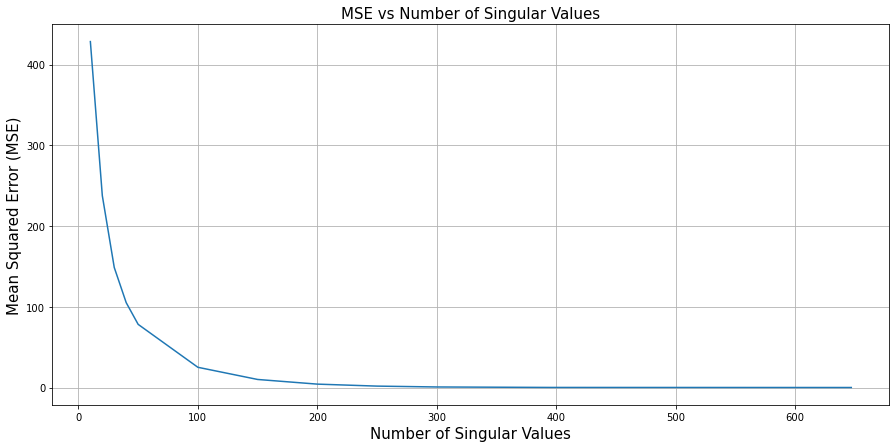

In [11]:
# MSE graph
plt.figure(figsize = (15, 7))
plt.plot(sing_val, mse)
plt.xlabel("Number of Singular Values", fontsize=15)
plt.ylabel("Mean Squared Error (MSE)", fontsize=15)
plt.title("MSE vs Number of Singular Values", fontsize=15)
plt.grid()
plt.show()

In [12]:
# Scree plot
var_explained = np.round(S**2/np.sum(S**2)*100, decimals=3)
print(var_explained[0:10])
sv = []

for i in range(0, 10):
    sv.append(str(i+1))

[76.171  3.51   2.594  1.638  1.562  1.139  1.002  0.962  0.852  0.728]


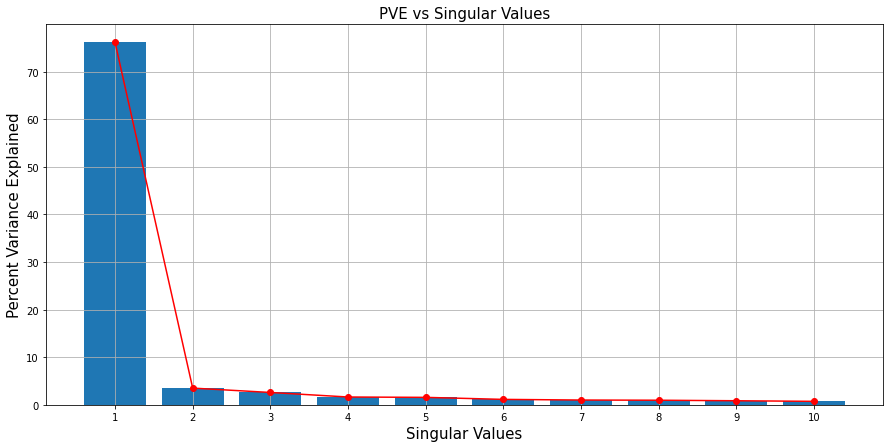

In [13]:
plt.figure(figsize = (15, 7))
plt.bar(sv[:10], var_explained[:10])
plt.plot(sv, var_explained[:10], 'r-o')
plt.xlabel("Singular Values", fontsize=15)
plt.ylabel("Percent Variance Explained", fontsize=15)
plt.title("PVE vs Singular Values", fontsize=15)
plt.grid()
plt.show()